In [132]:
import numpy as np
import os
import sys
import cv2 as cv
from matplotlib import pyplot as plt
import math
import pandas as pd
import seaborn as sns
import seaborn as sns
import scipy


# 3pt UpRight Analysis

In [28]:
first = "/Users/augustelefevre/Documents/Zurich/MA4/3DVision/FINAL/partial/estimated_rel_pose/scene0474_04_final_results_estimatedgravity_3p_gap32.txt"
results = np.loadtxt(scene_path, dtype=float)
path_directory = "/Users/augustelefevre/Documents/Zurich/MA4/3DVision/FINAL/partial/estimated_rel_pose/"
for scan in os.listdir(path_directory):
    scene_path = os.path.join(path_directory, scan)
    tmp = np.loadtxt(scene_path, dtype=float)
    results = np.concatenate((results, tmp), axis=0)

In [30]:
image = [x[1] for x in results]
R_err_10 = [x[2] for x in results]
t_err = [x[3] for x in results]
pts = [x[4] for x in results]
time = [x[6] for x in results]

[Text(0.5, 1.0, 'scatter plot R_err vs Running time')]

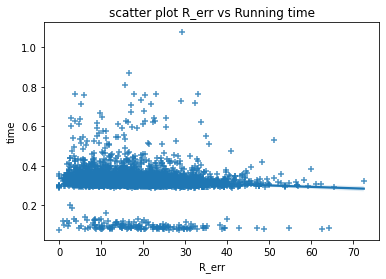

In [33]:
df = pd.DataFrame({'R_err':R_err_10, 'time':time})
m, b = np.polyfit(R_err_10, time, 1)
sns.regplot(data=df, x="R_err", y="time", marker="+").set(title='scatter plot R_err vs Running time')


In [35]:
avg = np.mean(R_err_10)
median = np.median(R_err_10)
std = np.std(R_err_10)
print(avg, median, std)
  
print("Q1 quantile of SLtractors : ", np.quantile(R_err_10, .25, interpolation='midpoint'))
print("Q2 quantile of SLtractors : ", np.quantile(R_err_10, .50, interpolation='midpoint'))
print("Q3 quantile of SLtractors : ", np.quantile(R_err_10, .75, interpolation='midpoint'))

17.964321939125508 16.806924526185917 9.913230731729167
Q1 quantile of SLtractors :  10.57627125385607
Q2 quantile of SLtractors :  16.806924526185917
Q3 quantile of SLtractors :  23.84410435767834


/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_33182/2517125223.py:6: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q1 quantile of SLtractors : ", np.quantile(R_err_10, .25, interpolation='midpoint'))
/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_33182/2517125223.py:7: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  print("Q2 quantile of SLtractors : ", np.quantile(R_err_10, .50, interpolation='midpoint'))
/var/folders/d0/6s5qwykd3r35_tc97lhkwtk00000gn/T/ipykernel_33182/2517125223.py:8: DeprecationWarning: the `interpolation=` argument to quantile was rename

In [130]:
# GLOBAL VARIABLE (CHANGE ACCORDING TO YOUR NEEDS)
directory_rel_pose_est_results = r"/Users/augustelefevre/Documents/Zurich/MA4/3DVision/FINAL/partial/estimated_rel_pose/"
######
directory_gravity_est_results = r"/Users/augustelefevre/Documents/Zurich/MA4/3DVision/FINAL/partial/predictions_witherror/"
######

# Don't modify from there
actual_folder_directory = ""
final_R = []
final_g = []
final_g_minus1 = []
# FOR LOOP TO ITERATE OVER IMAGES AND COMPUTE THE RELATIVE POSE ESTIMATION
for scan in os.listdir(directory_gravity_est_results):
    if scan.startswith("scene"):
        actual_directory_gravity_est_results = os.path.join(directory_gravity_est_results, scan)
        rel_pose_path = directory_rel_pose_est_results + scan + "_final_results_estimatedgravity_3p_gap32.txt"
        if os.path.isfile(rel_pose_path):
            rel_results = np.loadtxt(rel_pose_path, dtype=float)
            rel_results = sorted(rel_results, key=lambda x:x[0])
            R_err = [x[2] for x in rel_results]
        #####
            e_err = []
            for gravity_err in os.listdir(actual_directory_gravity_est_results):
                if gravity_err.endswith("error.txt"):
                    err_path = os.path.join(actual_directory_gravity_est_results, gravity_err)
                    err = np.loadtxt(err_path, dtype=float)
                    iid = gravity_err[:-10]
                    tmp = [err, iid]
                    e_err.append(tmp) 
                    
            e_err = sorted(e_err, key=lambda x:float(x[1]))
            print(e_err)
            print(rel_results)
            e_err_minus1 = e_err[:-1]
            #print(e_err)
            g_err = [x[0] for x in e_err]
            g_err_minus1 = [x[0] for x in e_err_minus1]
            if len(g_err_minus1) == len(R_err):
                final_R.append(R_err)
                final_g.append(g_err)
                final_g_minus1.append(g_err_minus1)

[[array(0.00760124), '0'], [array(0.01751366), '32'], [array(0.02883061), '64'], [array(0.0421445), '96'], [array(0.02695835), '128'], [array(0.01986186), '160'], [array(0.01561961), '192'], [array(0.05567475), '224'], [array(0.03425463), '256'], [array(0.02372863), '288'], [array(0.05811207), '320'], [array(0.06653741), '352'], [array(0.02013206), '384'], [array(0.0152352), '416'], [array(0.06021768), '448'], [array(0.07923187), '480'], [array(0.00820965), '512'], [array(0.05724249), '544'], [array(0.08185287), '576'], [array(0.09400417), '608'], [array(0.15663543), '640'], [array(0.09347462), '672'], [array(0.11074993), '704'], [array(0.06702131), '736'], [array(0.11277529), '768'], [array(0.03493283), '800']]
[array([  0.        ,  32.        ,  10.47029204,  90.        ,
       152.        , 152.        ,   0.37304044]), array([ 32.        ,  64.        ,   6.29234226,  90.        ,
       116.        , 116.        ,   0.37135458]), array([ 64.        ,  96.        ,  11.69077177, 

[[array(0.03418323), '0'], [array(0.0292879), '32'], [array(0.0318967), '64'], [array(0.02231813), '96'], [array(0.0421544), '128'], [array(0.02109085), '160'], [array(0.04738438), '192'], [array(0.02342688), '224'], [array(0.02717332), '256'], [array(0.09109443), '288'], [array(0.06587305), '320'], [array(0.01717442), '352'], [array(0.02477034), '384'], [array(0.03063662), '416'], [array(0.01967512), '448'], [array(0.02177487), '480'], [array(0.04657305), '512'], [array(0.07885711), '544'], [array(0.11224202), '576'], [array(0.04302441), '608'], [array(0.05368987), '640'], [array(0.01474868), '672'], [array(0.05451214), '704'], [array(0.06238194), '736'], [array(0.03286313), '768'], [array(0.08836188), '800'], [array(0.03220873), '832'], [array(0.03597212), '864'], [array(0.01084085), '896'], [array(0.02781471), '928'], [array(0.0332563), '960'], [array(0.10573585), '992']]
[array([ 0.        , 32.        , 10.74227629, 90.        , 43.        ,
       43.        ,  0.33110166]), arra

[[array(0.14594464), '0'], [array(0.15662353), '32'], [array(0.07917345), '64'], [array(0.0923777), '96'], [array(0.11940285), '128'], [array(0.16977037), '160'], [array(0.24759181), '192'], [array(0.2619498), '224'], [array(0.10385138), '256'], [array(0.07619449), '288'], [array(0.10925798), '320'], [array(0.12993455), '352'], [array(0.11924048), '384'], [array(0.11413147), '416'], [array(0.07836545), '448'], [array(0.13421366), '480'], [array(0.14523806), '512'], [array(0.16541493), '544'], [array(0.09454048), '576'], [array(0.05202298), '608'], [array(0.10036081), '640'], [array(0.01358169), '672'], [array(0.07817331), '704'], [array(0.04953313), '736'], [array(0.03136669), '768'], [array(0.01952026), '800'], [array(0.03005213), '832'], [array(0.0851208), '864'], [array(0.02352959), '896'], [array(0.01900599), '928'], [array(0.06877998), '960'], [array(0.02267798), '992'], [array(0.07367138), '1024'], [array(0.04994791), '1056'], [array(0.03056681), '1088'], [array(0.01927877), '112

In [124]:
all_R = []
for l in final_R:
    for e in l:
        all_R.append(e)

In [125]:
all_g = []
for l in final_g:
    for e in l:
        all_g.append(e)

In [126]:
all_g_minus1 = []
for l in final_g_minus1:
    for e in l:
        all_g_minus1.append(e)

In [127]:
all_R

[10.470292044147396,
 6.292342264125998,
 11.690771774535618,
 1.170872794769985,
 11.498804589270005,
 18.456863737605346,
 20.41977778791441,
 17.634012820393586,
 19.47800820283226,
 8.066436962778349,
 5.122152867385272,
 14.708415143657417,
 26.376866861949328,
 22.766588985418828,
 25.60953926649168,
 13.521845009521757,
 14.181990896130324,
 19.211340363698234,
 15.466674370254145,
 11.51758373683741,
 2.6004376522448234,
 1.2699952698496133,
 5.103802441361259,
 11.21437598610095,
 3.0717289910454,
 5.06432575071501,
 11.373345161573427,
 12.8923407331275,
 18.00795004224997,
 13.786779908537957,
 3.069535623176661,
 3.1416105316135017,
 6.679054363079441,
 21.370539479261083,
 36.13681488454148,
 4.638619502497492,
 6.25812774590818,
 6.87468935474658,
 21.921960992502555,
 15.298723591619458,
 13.7079008395245,
 16.470241461010897,
 19.818999623987523,
 8.981457825035516,
 11.570007925470371,
 12.779697949131334,
 17.421802023847548,
 15.586741444387586,
 14.277380839492201,


In [128]:
all_g = [float(x) for x in all_g]
all_g_minus1 = [float(x) for x in all_g_minus1]
all_g = all_g[1:]
all_g = [sum(x) for x in zip(all_g, all_g_minus1)]

[Text(0.5, 1.0, 'scatter plot R_err vs G_err')]

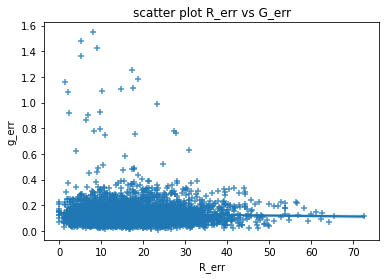

In [134]:
df = pd.DataFrame({'R_err':all_R, 'g_err':all_g})
m, b = np.polyfit(all_R, all_g, 1)
sns.regplot(data=df, x="R_err", y="g_err", marker="+").set(title='scatter plot R_err vs G_err')
#plt.yscale('log')


In [135]:
correlation, p_value = scipy.stats.pearsonr(all_g, all_R)
correlation

-0.03438844795448495